In [1]:
import pandas as pd
import numpy as np
from tkinter import*
import tkinter.ttk as ttk

In [2]:
data  = pd.read_csv("C:/Users/Desktop/ml-latest-small/ratings.csv")

In [3]:
data.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [4]:
del data["timestamp"]

In [5]:
data.head()

,userId,movieId,rating
0,1,1,4.0
1,1,3,4.0
2,1,6,4.0
3,1,47,5.0
4,1,50,5.0


In [6]:
data1 = pd.read_csv("C:/Users/Desktop/ml-latest-small/movies.csv")

In [7]:
data1.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [8]:
movie_data_ratings_data=data1.merge(data,on = 'movieId',how = 'inner')
movie_data_ratings_data.head(3)

,movieId,title,genres,userId,rating
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1,4.0
1,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,5,4.0
2,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,7,4.5


In [9]:
num_of_ratings=pd.DataFrame(movie_data_ratings_data.groupby("title")["rating"].mean())
num_of_ratings["num_of_ratings"] =pd.DataFrame(movie_data_ratings_data.groupby("title")["rating"].count())
num_of_ratings.head()

,rating,num_of_ratings
title,,
'71 (2014),4.0,1
'Hellboy': The Seeds of Creation (2004),4.0,1
'Round Midnight (1986),3.5,2
'Salem's Lot (2004),5.0,1
'Til There Was You (1997),4.0,2


# HIGH RATED MOVIES

In [10]:
def high_rated():
    
    
    print(num_of_ratings[num_of_ratings["num_of_ratings"]>100].sort_values("rating",ascending=False).drop("num_of_ratings",axis=1).head(20))
high_rated()


                                                      rating
title                                                       
Shawshank Redemption, The (1994)                    4.429022
Godfather, The (1972)                               4.289062
Fight Club (1999)                                   4.272936
Godfather: Part II, The (1974)                      4.259690
Departed, The (2006)                                4.252336
Goodfellas (1990)                                   4.250000
Dark Knight, The (2008)                             4.238255
Usual Suspects, The (1995)                          4.237745
Princess Bride, The (1987)                          4.232394
Star Wars: Episode IV - A New Hope (1977)           4.231076
Schindler's List (1993)                             4.225000
Apocalypse Now (1979)                               4.219626
American History X (1998)                           4.217054
Star Wars: Episode V - The Empire Strikes Back ...  4.215640
Raiders of the Lost Ark 

# LOW RATED MOVIES

In [11]:
def low_rated():
    
    
    print(num_of_ratings[num_of_ratings["rating"]<3.5].sort_values("rating").drop("num_of_ratings",axis=1).head(20))
low_rated()


                                           rating
title                                            
Killer Shrews, The (1959)                     0.5
Satanic (2016)                                0.5
Saving Christmas (2014)                       0.5
Haunted House 2, A (2014)                     0.5
Hard Ticket to Hawaii (1987)                  0.5
Secret Society (2002)                         0.5
Gypsy (1962)                                  0.5
Arthur Christmas (2011)                       0.5
Gods of Egypt (2016)                          0.5
God's Not Dead (2014)                         0.5
Glitter (2001)                                0.5
Giant Spider Invasion, The (1975)             0.5
General Died at Dawn, The (1936)              0.5
Fullmetal Alchemist 2018 (2017)               0.5
Rust and Bone (De rouille et d'os) (2012)     0.5
Skyline (2010)                                0.5
Sorrow (2015)                                 0.5
Follow Me, Boys! (1966)                       0.5


# POPULAR MOVIES

In [12]:
def popular_movies():
    popular_movies = num_of_ratings.sort_values("num_of_ratings",ascending=False)
    print(popular_movies.head())
popular_movies()

                                    rating  num_of_ratings
title                                                     
Forrest Gump (1994)               4.164134             329
Shawshank Redemption, The (1994)  4.429022             317
Pulp Fiction (1994)               4.197068             307
Silence of the Lambs, The (1991)  4.161290             279
Matrix, The (1999)                4.192446             278


# GENRES

In [13]:
def count_word(df, ref_col, liste):
    keyword_count = dict()
    for s in liste: keyword_count[s] = 0
    for liste_keywords in df[ref_col].str.split('|'):
        if type(liste_keywords) == float and pd.isnull(liste_keywords): continue
        for s in liste_keywords: 
            if pd.notnull(s): keyword_count[s] += 1
    # convert the dictionary in a list to sort the keywords  by frequency
    keyword_occurences = []
    for k,v in keyword_count.items():
        keyword_occurences.append([k,v])
    keyword_occurences.sort(key = lambda x:x[1], reverse = True)
    return keyword_occurences, keyword_count

In [14]:
genre_labels = set()
for s in data1['genres'].str.split('|').values:
    genre_labels = genre_labels.union(set(s))


In [15]:
keyword_occurences, dum = count_word(data1, 'genres', genre_labels)
keyword_occurences

[['Drama', 4361],
 ['Comedy', 3756],
 ['Thriller', 1894],
 ['Action', 1828],
 ['Romance', 1596],
 ['Adventure', 1263],
 ['Crime', 1199],
 ['Sci-Fi', 980],
 ['Horror', 978],
 ['Fantasy', 779],
 ['Children', 664],
 ['Animation', 611],
 ['Mystery', 573],
 ['Documentary', 440],
 ['War', 382],
 ['Musical', 334],
 ['Western', 167],
 ['IMAX', 158],
 ['Film-Noir', 87],
 ['(no genres listed)', 34]]

In [16]:
genres = pd.DataFrame(data=keyword_occurences,columns="genres occurences".split())
genres

,genres,occurences
0,Drama,4361
1,Comedy,3756
2,Thriller,1894
3,Action,1828
4,Romance,1596
5,Adventure,1263
6,Crime,1199
7,Sci-Fi,980
8,Horror,978
9,Fantasy,779


In [17]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

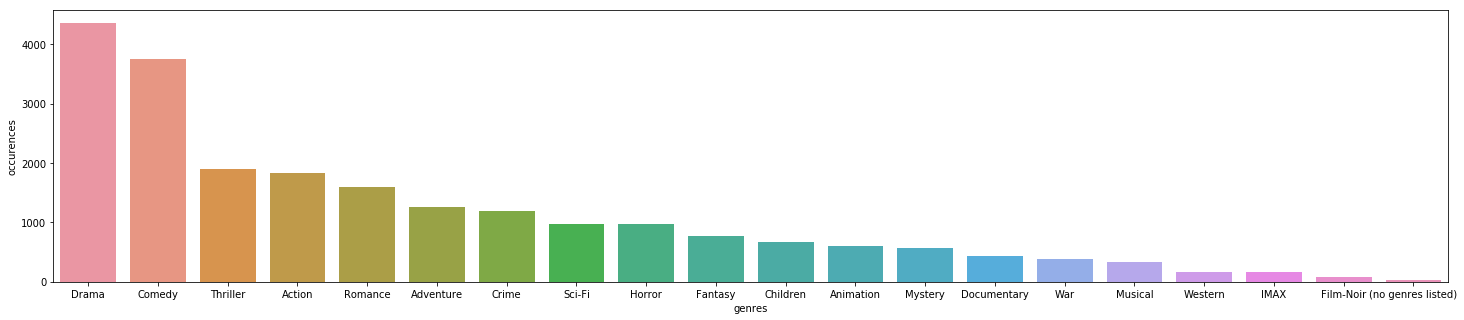

In [18]:
plt.figure(figsize=(25,5))
sns.barplot(x="genres",y="occurences",data=genres)

# NUMBER OF RATINGS

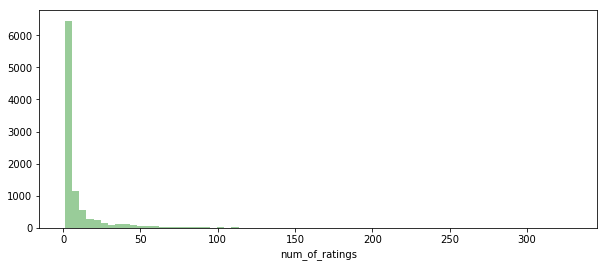

In [19]:
plt.figure(figsize=(10,4))

sns.distplot(num_of_ratings["num_of_ratings"],kde=False,bins=70,color="g")


# RATINGS

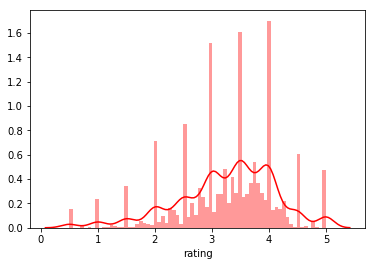

In [20]:
sns.distplot(num_of_ratings["rating"],bins=70,color="r")

# RECOMMENDATION

In [21]:
moviemat= movie_data_ratings_data.pivot_table(index="userId",columns="title",values="rating")
moviemat.head()

title,'71 (2014),'Hellboy': The Seeds of Creation (2004),'Round Midnight (1986),'Salem's Lot (2004),'Til There Was You (1997),'Tis the Season for Love (2015),"'burbs, The (1989)",'night Mother (1986),(500) Days of Summer (2009),*batteries not included (1987),...,Zulu (2013),[REC] (2007),[REC]² (2009),[REC]³ 3 Génesis (2012),anohana: The Flower We Saw That Day - The Movie (2013),eXistenZ (1999),xXx (2002),xXx: State of the Union (2005),¡Three Amigos! (1986),À nous la liberté (Freedom for Us) (1931)
userId,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [22]:
Terminator2=moviemat["Terminator 2: Judgment Day (1991)"]
Terminator2.head()

userId
1    NaN
2    NaN
3    NaN
4    NaN
5    3.0
Name: Terminator 2: Judgment Day (1991), dtype: float64

In [23]:
similar_movie = moviemat.corrwith(Terminator2)
similar_movie.head()

C:\Users\Anshu Pandey\Anaconda3\lib\site-packages\numpy\lib\function_base.py:2522: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar)
C:\Users\Anshu Pandey\Anaconda3\lib\site-packages\numpy\lib\function_base.py:2451: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)


title
'71 (2014)                                NaN
'Hellboy': The Seeds of Creation (2004)   NaN
'Round Midnight (1986)                    NaN
'Salem's Lot (2004)                       NaN
'Til There Was You (1997)                 NaN
dtype: float64

In [24]:
corr_Terminator= pd.DataFrame(similar_movie,columns=["Correlation"])
corr_Terminator.dropna(inplace=True)
corr_Terminator.head()

,Correlation
title,
"'burbs, The (1989)",-0.050602
(500) Days of Summer (2009),0.411008
*batteries not included (1987),0.566379
...And Justice for All (1979),-0.327327
10 Cent Pistol (2015),-1.000000


In [25]:
corr_Terminator.sort_values("Correlation",ascending=False).head()

,Correlation
title,
"Great Yokai War, The (Yôkai daisensô) (2005)",1.0
Barbershop 2: Back in Business (2004),1.0
Killers (2010),1.0
Summer Rental (1985),1.0
Dead or Alive: Hanzaisha (1999),1.0


In [26]:
corr_Terminator = corr_Terminator.join(num_of_ratings["num_of_ratings"])
corr_Terminator.sort_values("Correlation",ascending=False).head()

,Correlation,num_of_ratings
title,,
"Great Yokai War, The (Yôkai daisensô) (2005)",1.0,2
Barbershop 2: Back in Business (2004),1.0,3
Killers (2010),1.0,2
Summer Rental (1985),1.0,4
Dead or Alive: Hanzaisha (1999),1.0,2


In [27]:
print("RECOMMENDED MOVIES")
corr_Terminator[corr_Terminator["num_of_ratings"]>100].sort_values("Correlation",ascending=False).head()


RECOMMENDED MOVIES


,Correlation,num_of_ratings
title,,
Terminator 2: Judgment Day (1991),1.000000,224
"Terminator, The (1984)",0.689997,131
Trainspotting (1996),0.546834,102
Die Hard (1988),0.495921,145
Outbreak (1995),0.493281,101


In [28]:
corr_

NameError: name 'corr_' is not defined

In [52]:
from tkinter import*
import tkinter.ttk as ttk
import csv     

In [48]:
from tkinter import*
import tkinter.ttk as ttk
import csv
def Recommendation():
    movie=user_entry.get()
    Movie=moviemat[movie]
    similar_movie = moviemat.corrwith(Movie)

    corr_movie= pd.DataFrame(similar_movie,columns=["Correlation"])
    corr_movie.dropna(inplace=True)
    
    corr_movie.sort_values("Correlation",ascending=False).head()
    corr_movie = corr_movie.join(num_of_ratings["num_of_ratings"])
    
    
    
    df5=pd.DataFrame(corr_movie[corr_movie["num_of_ratings"]>100].sort_values("Correlation",ascending=False,inplace=True))
    df5.to_csv('C:/Users/Anshu Pandey/Desktop/ml-latest-small/recommendation.csv')
    
    root = Tk()
    root.title("Recommendation Movies")
    TableMargin = Frame(root, width=500)
    TableMargin.pack(side=TOP)
    scrollbarx = Scrollbar(TableMargin, orient=HORIZONTAL)
    scrollbary = Scrollbar(TableMargin, orient=VERTICAL)
    tree = ttk.Treeview(TableMargin, columns=("title", "Correlation", "num_of_ratings"), height=400, selectmode="extended", yscrollcommand=scrollbary.set, xscrollcommand=scrollbarx.set)
    scrollbary.config(command=tree.yview)
    scrollbary.pack(side=RIGHT, fill=Y)
    scrollbarx.config(command=tree.xview)
    scrollbarx.pack(side=BOTTOM, fill=X)
    tree.heading('title', text="title", anchor=W)
    tree.heading('Correlation', text="Correlation", anchor=W)
    tree.heading('num_of_ratings', text="num_of_ratings", anchor=W)
    tree.column('#0', stretch=NO, minwidth=0, width=0)
    tree.column('#1', stretch=NO, minwidth=0, width=200)
    tree.column('#2', stretch=NO, minwidth=0, width=200)
    tree.column('#3', stretch=NO, minwidth=0, width=300)
    tree.pack()
    with open("C:/Users/Anshu Pandey/Desktop/ml-latest-small/recommendation.csv",encoding='latin-1') as f:
        reader=csv.DictReader(f, delimiter=',')
        for row in reader:
            firstname = row['title']
            lastname = row['Correlation']
            address = row['num_of_ratings']
            tree.insert("", 0, values=(firstname, lastname, address))
    if __name__ == '__main__':
        root.mainloop()
    

In [42]:
from tkinter import*
import tkinter.ttk as ttk
import csv
def Hm():
    root = Tk()
    root.title("Horror Movies......")
    TableMargin = Frame(root, width=500)
    TableMargin.pack(side=TOP)
    scrollbarx = Scrollbar(TableMargin, orient=HORIZONTAL)
    scrollbary = Scrollbar(TableMargin, orient=VERTICAL)
    tree = ttk.Treeview(TableMargin, columns=("MovieId", "Movies", "Geners"), height=400, selectmode="extended", yscrollcommand=scrollbary.set, xscrollcommand=scrollbarx.set)
    scrollbary.config(command=tree.yview)
    scrollbary.pack(side=RIGHT, fill=Y)
    scrollbarx.config(command=tree.xview)
    scrollbarx.pack(side=BOTTOM, fill=X)
    tree.heading('MovieId', text="movieId", anchor=W)
    tree.heading('Movies', text="Movies", anchor=W)
    tree.heading('Geners', text="Geners", anchor=W)
    tree.column('#0', stretch=NO, minwidth=0, width=0)
    tree.column('#1', stretch=NO, minwidth=0, width=200)
    tree.column('#2', stretch=NO, minwidth=0, width=200)
    tree.column('#3', stretch=NO, minwidth=0, width=300)
    tree.pack()
    with open("C:/Users/Anshu Pandey/Desktop/ml-latest-small/Horror.csv ",encoding='latin-1') as f:
        reader=csv.DictReader(f, delimiter=',')
        for row in reader:
            firstname = row['MovieId']
            lastname = row['Movies']
            address = row['Geners']
            tree.insert("", 0, values=(firstname, lastname, address))
    if __name__ == '__main__':
        root.mainloop()

In [43]:
def Am():
    root = Tk()
    root.title("Animation Movies......")
    TableMargin = Frame(root, width=500)
    TableMargin.pack(side=TOP)
    scrollbarx = Scrollbar(TableMargin, orient=HORIZONTAL)
    scrollbary = Scrollbar(TableMargin, orient=VERTICAL)
    tree = ttk.Treeview(TableMargin, columns=("MovieId", "Movies", "Geners"), height=400, selectmode="extended", yscrollcommand=scrollbary.set, xscrollcommand=scrollbarx.set)
    scrollbary.config(command=tree.yview)
    scrollbary.pack(side=RIGHT, fill=Y)
    scrollbarx.config(command=tree.xview)
    scrollbarx.pack(side=BOTTOM, fill=X)
    tree.heading('MovieId', text="movieId", anchor=W)
    tree.heading('Movies', text="Movies", anchor=W)
    tree.heading('Geners', text="Geners", anchor=W)
    tree.column('#0', stretch=NO, minwidth=0, width=0)
    tree.column('#1', stretch=NO, minwidth=0, width=200)
    tree.column('#2', stretch=NO, minwidth=0, width=200)
    tree.column('#3', stretch=NO, minwidth=0, width=300)
    tree.pack()
    with open("C:/Users/Anshu Pandey/Desktop/ml-latest-small/Animation.csv ",encoding='latin-1') as f:
        reader=csv.DictReader(f, delimiter=',')
        for row in reader:
            firstname = row['MovieId']
            lastname = row['Movies']
            address = row['Geners']
            tree.insert("", 0, values=(firstname, lastname, address))
    if __name__ == '__main__':
        root.mainloop()

In [44]:
def Dm():
    root = Tk()
    root.title("Drama Movies......")
    TableMargin = Frame(root, width=500)
    TableMargin.pack(side=TOP)
    scrollbarx = Scrollbar(TableMargin, orient=HORIZONTAL)
    scrollbary = Scrollbar(TableMargin, orient=VERTICAL)
    tree = ttk.Treeview(TableMargin, columns=("MovieId", "Movies", "Geners"), height=400, selectmode="extended", yscrollcommand=scrollbary.set, xscrollcommand=scrollbarx.set)
    scrollbary.config(command=tree.yview)
    scrollbary.pack(side=RIGHT, fill=Y)
    scrollbarx.config(command=tree.xview)
    scrollbarx.pack(side=BOTTOM, fill=X)
    tree.heading('MovieId', text="movieId", anchor=W)
    tree.heading('Movies', text="Movies", anchor=W)
    tree.heading('Geners', text="Geners", anchor=W)
    tree.column('#0', stretch=NO, minwidth=0, width=0)
    tree.column('#1', stretch=NO, minwidth=0, width=200)
    tree.column('#2', stretch=NO, minwidth=0, width=200)
    tree.column('#3', stretch=NO, minwidth=0, width=300)
    tree.pack()
    with open("C:/Users/Anshu Pandey/Desktop/ml-latest-small/Drama.csv ",encoding='latin-1') as f:
        reader=csv.DictReader(f, delimiter=',')
        for row in reader:
            firstname = row['MovieId']
            lastname = row['Movies']
            address = row['Geners']
            tree.insert("", 0, values=(firstname, lastname, address))
    if __name__ == '__main__':
        root.mainloop()


In [45]:
def Cm():
    root = Tk()
    root.title("Crime Movies......")
    TableMargin = Frame(root, width=500)
    TableMargin.pack(side=TOP)
    scrollbarx = Scrollbar(TableMargin, orient=HORIZONTAL)
    scrollbary = Scrollbar(TableMargin, orient=VERTICAL)
    tree = ttk.Treeview(TableMargin, columns=("MovieId", "Movies", "Geners"), height=400, selectmode="extended", yscrollcommand=scrollbary.set, xscrollcommand=scrollbarx.set)
    scrollbary.config(command=tree.yview)
    scrollbary.pack(side=RIGHT, fill=Y)
    scrollbarx.config(command=tree.xview)
    scrollbarx.pack(side=BOTTOM, fill=X)
    tree.heading('MovieId', text="movieId", anchor=W)
    tree.heading('Movies', text="Movies", anchor=W)
    tree.heading('Geners', text="Geners", anchor=W)
    tree.column('#0', stretch=NO, minwidth=0, width=0)
    tree.column('#1', stretch=NO, minwidth=0, width=200)
    tree.column('#2', stretch=NO, minwidth=0, width=200)
    tree.column('#3', stretch=NO, minwidth=0, width=300)
    tree.pack()
    with open("C:/Users/Anshu Pandey/Desktop/ml-latest-small/Crime.csv ",encoding='latin-1') as f:
        reader=csv.DictReader(f, delimiter=',')
        for row in reader:
            firstname = row['MovieId']
            lastname = row['Movies']
            address = row['Geners']
            tree.insert("", 0, values=(firstname, lastname, address))
    if __name__ == '__main__':
        root.mainloop()

In [46]:
def Fm():
    root = Tk()
    root.title("Fantacy Movies......")
    TableMargin = Frame(root, width=500)
    TableMargin.pack(side=TOP)
    scrollbarx = Scrollbar(TableMargin, orient=HORIZONTAL)
    scrollbary = Scrollbar(TableMargin, orient=VERTICAL)
    tree = ttk.Treeview(TableMargin, columns=("MovieId", "Movies", "Geners"), height=500, selectmode="extended", yscrollcommand=scrollbary.set, xscrollcommand=scrollbarx.set)
    scrollbary.config(command=tree.yview)
    scrollbary.pack(side=RIGHT, fill=Y)
    scrollbarx.config(command=tree.xview)
    scrollbarx.pack(side=BOTTOM, fill=X)
    tree.heading('MovieId', text="movieId", anchor=W)
    tree.heading('Movies', text="Movies", anchor=W)
    tree.heading("Geners", text="Geners", anchor=W)
    tree.column('#0', stretch=NO, minwidth=0, width=0)
    tree.column('#1', stretch=NO, minwidth=0, width=500)
    tree.column('#2', stretch=NO, minwidth=0, width=500)
    tree.column('#3', stretch=NO, minwidth=0, width=500)
    tree.pack()
    with open("C:/Users/Anshu Pandey/Desktop/ml-latest-small/fantacy.csv ",encoding="latin-1") as f:
        reader=csv.DictReader(f, delimiter=',')
        for row in reader:
            firstname = row['MovieId']
            lastname = row['Movies']
            address = row['Geners']
            tree.insert("", 0, values=(firstname, lastname, address))
    if __name__ == '__main__':
        root.mainloop()

In [49]:
from tkinter import*
root = Tk()
root.geometry("1200x600")

f1= Frame(root,width="1350",height="400",bg="grey",borderwidth=10,relief=SUNKEN)
f1.pack(side=TOP,fill="x")

l1 =Label(f1,text="Movies...Expert",fg="brown",font="Arial 30 bold",bg="grey")
l1.pack()

f2 = Frame(root,borderwidth=6,bg="grey",relief=SUNKEN)
f2.pack(anchor="nw",fill="x")
scrollbarx = Scrollbar(f1, orient=HORIZONTAL)
scrollbary = Scrollbar(f1, orient=VERTICAL)

scrollbary.pack(side=RIGHT, fill=Y)

scrollbarx.pack(side=BOTTOM, fill=X)

'''b1 = Button(f2,text="High Rated Movies",fg="green",font="Arial 22 bold",command=high_rated)
b1.pack(side=LEFT,padx=20,pady=20)

b2 = Button(f2,text="Low Rated Movies",fg="green",font="Arial 22 bold",command=low_rated)
b2.pack(side=LEFT,padx=20,pady=20)

b3 = Button(f2,text="Popular movies",fg="green",font="Arial 22 bold",command=popular_movies)
b3.pack(side=LEFT,padx=20,pady=20)
'''
b4 = Button(f2,text="Binge-Worthy Fantacy Movies",fg="green",font="Arial 22 bold",command=Fm)
b4.pack(side=LEFT,padx=10,pady=10)

b5 = Button(f2,text="Binge-Worthy Drama Movies",fg="green",font="Arial 22 bold",command=Dm)
b5.pack(side=LEFT,padx=10,pady=10)

b6 = Button(f2,text="Binge-Worthy Crime Movies",fg="green",font="Arial 22 bold",command=Cm)
b6.pack(side=LEFT,padx=10,pady=10)

b7 = Button(f2,text="Binge-Worthy Horror Movies",fg="green",font="Arial 22 bold",command=Hm)
b7.pack(side=LEFT,padx=10,pady=10)
b8 = Button(f2,text="Binge-Worthy Animation Movies",fg="green",font="Arial 22 bold",command=Am)
b8.pack(side=LEFT,padx=10,pady=10)

f3 = Frame(root,borderwidth=6,bg="grey",relief=SUNKEN,width="1350",height="400")
f3.pack(side=TOP,fill="x",pady=100)

movie= Label(f3,text="Enter the name of movie",font="Arial 40 bold",bg="grey",padx=50,pady=60)
movie.grid(row=5,column=5)

uservalue=StringVar()

user_entry=Entry(f3,textvariable=uservalue,font="Arial 20 bold",fg="red")
user_entry.grid(row=5,column=8)
b5=Button(f3,text="Submit",font="Arial 15 bold",command=Recommendation)
b5.grid(row=5,column=12,padx=5)

root.mainloop()

C:\Users\Anshu Pandey\Anaconda3\lib\site-packages\numpy\lib\function_base.py:2522: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar)
C:\Users\Anshu Pandey\Anaconda3\lib\site-packages\numpy\lib\function_base.py:2451: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)
C:\Users\Anshu Pandey\Anaconda3\lib\site-packages\ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


## function

In [36]:
from tkinter import*
import tkinter.ttk as ttk
import csv
def genres_function():
    list_Add=[]
    genres=input("enter geners:>>>>>").capitalize()
    with open('C:/Users/Anshu Pandey/Desktop/ml-latest-small/crime.csv', 'w',newline='') as myfile:
        wr = csv.writer(myfile)
        with open("C:/Users/Anshu Pandey/Desktop/ml-latest-small/movies.csv",'r',encoding="utf8") as movies:
            reader = csv.reader(movies)
            for row in reader:
                l=row[2]
                liste=l.split('|')
                if genres in liste:
                    print(row)
                    wr.writerow(row)
                    
     
            
            
genres_function()

enter geners:>>>>>crime
['6', 'Heat (1995)', 'Action|Crime|Thriller']
['16', 'Casino (1995)', 'Crime|Drama']
['20', 'Money Train (1995)', 'Action|Comedy|Crime|Drama|Thriller']
['21', 'Get Shorty (1995)', 'Comedy|Crime|Thriller']
['22', 'Copycat (1995)', 'Crime|Drama|Horror|Mystery|Thriller']
['23', 'Assassins (1995)', 'Action|Crime|Thriller']
['30', 'Shanghai Triad (Yao a yao yao dao waipo qiao) (1995)', 'Crime|Drama']
['36', 'Dead Man Walking (1995)', 'Crime|Drama']
['42', 'Dead Presidents (1995)', 'Action|Crime|Drama']
['50', 'Usual Suspects, The (1995)', 'Crime|Mystery|Thriller']
['63', "Don't Be a Menace to South Central While Drinking Your Juice in the Hood (1996)", 'Comedy|Crime']
['78', 'Crossing Guard, The (1995)', 'Action|Crime|Drama|Thriller']
['81', "Things to Do in Denver When You're Dead (1995)", 'Crime|Drama|Romance']
['97', 'Hate (Haine, La) (1995)', 'Crime|Drama']
['101', 'Bottle Rocket (1996)', 'Adventure|Comedy|Crime|Romance']
['111', 'Taxi Driver (1976)', 'Crime|Dram